<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: Navid Bagheri

**Student ID**: 99109658

# Classification

In this question, we will examine classification algorithms. We do not need to implement the algorithms; instead, we will use the functions available in the `scikit-learn` library to solve the question.

## Importing Libraries

First, we import all required libraries.

**Attention**: You should only use these libraries. Other libraries are not acceptable.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

## Loading Data

In this question, we will use the **Breast Cancer** dataset from `scikit-learn`. You can run the following cell to load the dataset:

In [2]:
data = load_breast_cancer() # loading cancer data

X = data.data # features
Y = data.target # labels 

# printing size of the features and targets
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


Now you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [4]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , train_size = 0.7 , shuffle = False)
X_val , X_test , Y_val , Y_test ,  = train_test_split(X_test , Y_test , test_size = 1/3 , shuffle = False)
# print('X_train & Y_train:',X_train.shape,Y_train.shape)
# print('X_val & Y_val:',X_val.shape,Y_val.shape)
# print('X_test & Y_test:',X_test.shape,Y_test.shape)
### END CODE HERE ###

## Logistic Regression

In this part of the question, you will use the `LogisticRegression` classifier to classify the data. You should change the value of `C`, which is the inverse of the regularization parameter, and find the accuracy on the validation set. Using the validation accuracy, you can find the best value for `C`. Note that you may want to change the solver for faster convergence. The `liblinear` solver is recommended for this problem. You can visit [this link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for more information about the `LogisticRegression` classifier.

**Question**: What is the best value of `C`?

**Answer**: Best value of C is : 9.42

In [19]:
### START CODE HERE ###
c = np.arange(0.01, 50, 0.01)
accuracy_old = 0
best_C = 0
for i in (c):
  clf = LogisticRegression(C = i , solver = 'liblinear').fit(X_train, Y_train)
  accuracy_new = clf.score(X_val, Y_val)
  if accuracy_new > accuracy_old :
    best_C = i
    accuracy_old = accuracy_new
print('Best value of C is:',best_C)
print('Best validation accuracy is:',accuracy_old)

### END CODE HERE ###


Best value of C is: 9.42
Best validation accuracy is: 0.956140350877193


Now use your best classifier to calculate the accuracy on the test set.

**Qusetion**: What is the accuracy of this classifier on test set?

**Answer**:Accuracy on test set is: 0.9649122807017544

In [20]:
### START CODE HERE ###
clf = LogisticRegression(C = best_C , solver = 'liblinear').fit(X_train, Y_train)
print('Accuracy on test set is:',clf.score(X_test, Y_test))
### END CODE HERE ###

Accuracy on test set is: 0.9649122807017544


For this additional part, you can use only the first two features of the dataset to classify the data and then draw the data points and the boundary on a figure. You can use the [tutorial](https://aleksandarhaber.com/solve-classification-problems-in-python-scikit-learn-and-visualize-the-classification-results-machine-learning-tutorial/?utm_source=rss&utm_medium=rss&utm_campaign=solve-classification-problems-in-python-scikit-learn-and-visualize-the-classification-results-machine-learning-tutorial) provided to learn how to do this. You may need to use additional libraries such as `matplotlib` specifically for this part.

<ipython-input-21-780604d87e01>:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax[0].scatter(XtrainSet[ytrainSet==classesNumbers[index1],0],XtrainSet[ytrainSet==classesNumbers[index1],1],
<ipython-input-21-780604d87e01>:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax[1].scatter(XtestSet[ytestSet==classesNumbers[index1],0],XtestSet[ytestSet==classesNumbers[index1],1],


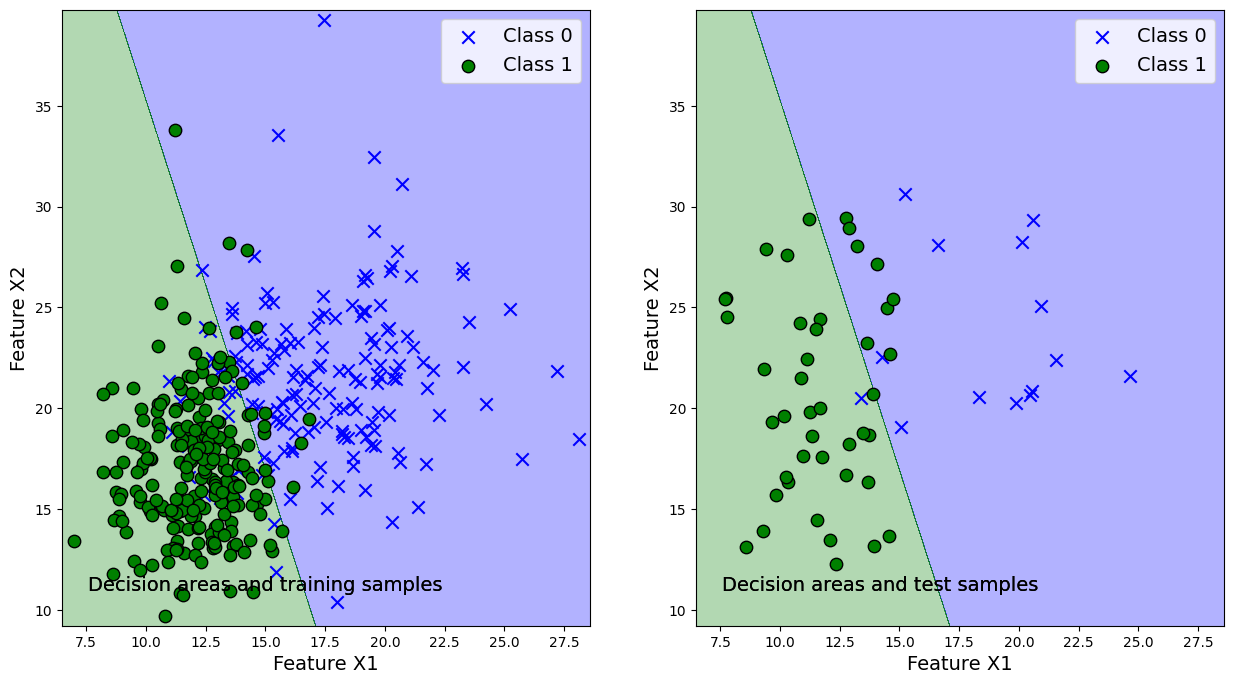

In [21]:
### START CODE HERE ###
def visualizeClassificationAreas(usedClassifier,XtrainSet, ytrainSet,XtestSet, ytestSet, plotDensity=0.01 ):
  import matplotlib.pyplot as plt
  from matplotlib.colors import ListedColormap

  colorList=["blue", "green", "orange", "magenta", "purple", "red"]
  markerClass=['x','o','v','#','*','>'] 

  classesNumbers=np.unique(ytrainSet)
  numberOfDifferentClasses=classesNumbers.size
  cmapObject=ListedColormap(colorList, N=numberOfDifferentClasses)

  x1featureMin=min(XtrainSet[:,0].min(),XtestSet[:,0].min())-0.5
  x1featureMax=max(XtrainSet[:,0].max(),XtestSet[:,0].max())+0.5
  x2featureMin=min(XtrainSet[:,1].min(),XtestSet[:,1].min())-0.5
  x2featureMax=max(XtrainSet[:,1].max(),XtestSet[:,1].max())+0.5

  x1meshGrid,x2meshGrid = np.meshgrid(np.arange(x1featureMin,x1featureMax,plotDensity),np.arange(x2featureMin,x2featureMax,plotDensity))
  XregionClassifier = np.array([x1meshGrid.ravel(),x2meshGrid.ravel()]).T

  predictedClassesRegion=usedClassifier.predict(XregionClassifier)
  predictedClassesRegion=predictedClassesRegion.reshape(x1meshGrid.shape)

  fig, ax = plt.subplots(1,2,figsize=(15,8))
  ax[0].contourf(x1meshGrid,x2meshGrid,predictedClassesRegion,alpha=0.3,cmap=cmapObject);
  ax[1].contourf(x1meshGrid,x2meshGrid,predictedClassesRegion,alpha=0.3,cmap=cmapObject);

  for index1 in np.arange(numberOfDifferentClasses):
    ax[0].scatter(XtrainSet[ytrainSet==classesNumbers[index1],0],XtrainSet[ytrainSet==classesNumbers[index1],1], 
               alpha=1, c=colorList[index1], marker=markerClass[index1], 
               label="Class {}".format(classesNumbers[index1]), edgecolor='black', s=80);
         
    ax[1].scatter(XtestSet[ytestSet==classesNumbers[index1],0],XtestSet[ytestSet==classesNumbers[index1],1], 
               alpha=1, c=colorList[index1], marker=markerClass[index1],
               label="Class {}".format(classesNumbers[index1]), edgecolor='black', s=80);
         
    ax[0].set_xlabel("Feature X1",fontsize=14);
    ax[0].set_ylabel("Feature X2",fontsize=14);
    ax[0].text(0.05, 0.05, "Decision areas and training samples", transform=ax[0].transAxes, fontsize=14, verticalalignment='bottom');
    ax[0].legend(fontsize=14);
     
    ax[1].set_xlabel("Feature X1",fontsize=14);
    ax[1].set_ylabel("Feature X2",fontsize=14);
    ax[1].text(0.05, 0.05, "Decision areas and test samples", transform=ax[1].transAxes, fontsize=14, verticalalignment='bottom');
    ax[1].legend(fontsize=14)


visualizeClassificationAreas(LogisticRegression(C = best_C , solver = 'liblinear').fit(X_train[:,0:2], Y_train),X_train[:,0:2], Y_train,X_test[:,0:2], Y_test );
### END CODE HERE ###

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:Accuracy on test set is: 0.9473684210526315

In [22]:
### START CODE HERE ###
clf = clf = GaussianNB().fit(X_train, Y_train)
print('Accuracy on test set is:',clf.score(X_test, Y_test))
### END CODE HERE ###

Accuracy on test set is: 0.9473684210526315


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:Accuracy on test set is: 0.9473684210526315

In [23]:
### START CODE HERE ###
clf = LinearDiscriminantAnalysis().fit(X_train, Y_train)
print('Accuracy on test set is:',clf.score(X_test, Y_test))
### END CODE HERE ###

Accuracy on test set is: 0.9473684210526315


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**:
Linear regression with the accuracy of 0.9649122807017544

همانطور که از میزان دقت روی تست ست مشخص است روش اول یعنی رگرسیون خطی بهترین روش بوده و بیشترین دقت را دارد 
البته اگر تقسیم بندی داده‌ها در ابتدا به صورت رندوم و شافل باشد تمامی پاسخ‌ها ممکن است هر بار تغییر کنند مثلا مقدار بهترین ضریب سی و همچنین بهترین روش